In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spf = pd.read_csv('spotify_churn_dataset.csv')

In [3]:
spf.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [4]:
spf.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

# 

In [5]:
spf.columns

Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [6]:
col = ['gender','country', 'subscription_type','device_type']

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
LE = LabelEncoder()

In [9]:
for i in col:
    spf[i]=LE.fit_transform(spf[i])

In [10]:
spf.drop('user_id',axis=1,inplace=True)

In [11]:
spf.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,0,54,1,1,26,23,0.20,0,31,0,1
1,2,33,2,0,141,62,0.34,2,0,1,0
2,1,38,0,2,199,38,0.04,1,0,1,1
3,0,22,1,3,36,2,0.31,1,0,1,0
4,2,29,7,0,250,57,0.36,1,0,1,1


In [12]:
spf.corr()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
gender,1.000000,-0.009925,-0.004235,-0.013962,0.004202,0.012692,0.004333,0.007439,0.003859,0.004498,-0.000935
age,-0.009925,1.000000,0.015196,-0.006185,-0.012975,-0.006834,-0.019557,-0.016369,-0.011962,0.017061,0.003982
country,-0.004235,0.015196,1.000000,0.009820,0.003588,-0.012559,-0.016346,0.010894,-0.002306,-0.007316,-0.003236
subscription_type,-0.013962,-0.006185,0.009820,1.000000,0.014165,0.012231,0.002066,-0.010634,-0.238393,0.271528,-0.009537
listening_time,0.004202,-0.012975,0.003588,0.014165,1.000000,-0.010996,-0.013603,-0.004089,0.002279,-0.006421,-0.007624
songs_played_per_day,0.012692,-0.006834,-0.012559,0.012231,-0.010996,1.000000,-0.000590,-0.008266,-0.017813,0.018846,0.009314
skip_rate,0.004333,-0.019557,-0.016346,0.002066,-0.013603,-0.000590,1.000000,0.010204,-0.012682,-0.002657,0.016121
device_type,0.007439,-0.016369,0.010894,-0.010634,-0.004089,-0.008266,0.010204,1.000000,0.016073,-0.021408,-0.006210
ads_listened_per_week,0.003859,-0.011962,-0.002306,-0.238393,0.002279,-0.017813,-0.012682,0.016073,1.000000,-0.877970,-0.002279
offline_listening,0.004498,0.017061,-0.007316,0.271528,-0.006421,0.018846,-0.002657,-0.021408,-0.877970,1.000000,0.012754


In [13]:
spf['skip_rate'] = (spf['skip_rate']*100)
spf['skip_rate'] = spf['skip_rate'].astype(int)
# ii have added this later to suit the data for classification since continous data is not accepted

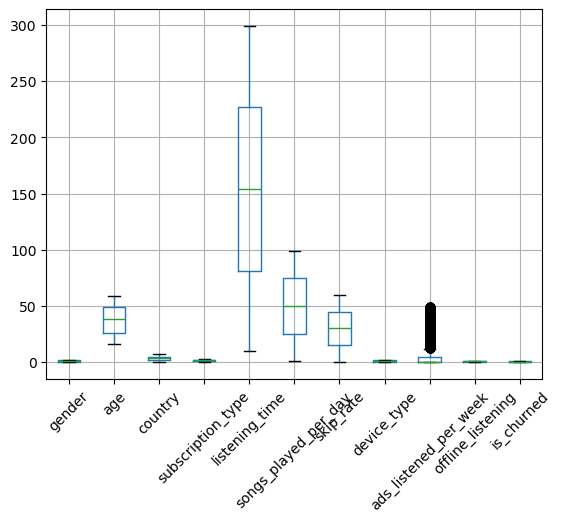

In [14]:
spf.boxplot()
plt.xticks(rotation=45);

In [15]:
spf.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,0,54,1,1,26,23,20,0,31,0,1
1,2,33,2,0,141,62,34,2,0,1,0
2,1,38,0,2,199,38,4,1,0,1,1
3,0,22,1,3,36,2,31,1,0,1,0
4,2,29,7,0,250,57,36,1,0,1,1


In [16]:
spf_class = spf.copy()

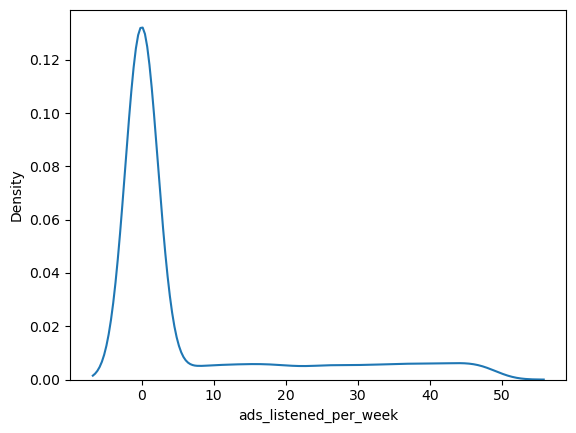

In [17]:
sns.kdeplot(data=spf, x='ads_listened_per_week')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [19]:
SS = StandardScaler()

In [20]:
spf.columns

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [21]:
cols = ['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned']

In [22]:
for i in cols:
    spf[i] = SS.fit_transform(spf[[i]])

In [23]:
spf.boxplot()
plt.xticks(rotation=45);

# 

# Using classification techniques

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
RF = RandomForestClassifier()

In [26]:
X = spf_class.drop('is_churned', axis=1)

In [27]:
y = spf_class['is_churned']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [45]:
y_train.value_counts()

is_churned
0    4131
1    1469
Name: count, dtype: int64

# 

As you can see that there is a lot of bias in data now we have to handel bias

## 

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [55]:
y_res.value_counts()

is_churned
0    4131
1    4131
Name: count, dtype: int64

In [49]:
RF.fit(X_res,y_res)

RandomForestClassifier()

In [50]:
y_pred = RF.predict(X_test)

# 

# Evaluation

In [51]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [52]:
f1_score(y_test,y_pred)

0.28663967611336033

In [53]:
accuracy_score(y_test,y_pred)

0.6329166666666667

In [54]:
confusion_matrix(y_test,y_pred)

array([[1342,  456],
       [ 425,  177]])

# 

# Using Logistic Regression

Using logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
LR = LogisticRegression()

In [58]:
LR.fit(X_res,y_res)

C:\Users\Daksh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
LR_pred=LR.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      1798
           1       0.25      0.43      0.32       602

    accuracy                           0.53      2400
   macro avg       0.50      0.50      0.48      2400
weighted avg       0.62      0.53      0.56      2400



In [62]:
confusion_matrix(y_test,LR_pred)

array([[1021,  777],
       [ 343,  259]])

# 

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DTC = DecisionTreeClassifier()

In [66]:
DTC.fit(X_res,y_res)

DecisionTreeClassifier()

In [68]:
y_pred = DTC.predict(X_test)

# 

# Evaluation

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1798
           1       0.24      0.38      0.30       602

    accuracy                           0.55      2400
   macro avg       0.49      0.49      0.48      2400
weighted avg       0.62      0.55      0.58      2400



In [71]:
f1_score(y_test,y_pred)

0.2961992136304063